### Name:Hamza gazi
 Github Link:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
df=pd.read_csv(r"C:\Users\Hamza\Downloads\Telco-Customer.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   
df.fillna(df.median(numeric_only=True),inplace=True)

In [17]:
df.drop(columns=['customerID'], inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder  

cat_cols = df.select_dtypes(include=['object']).columns  

le = LabelEncoder()  
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
from sklearn.preprocessing import StandardScaler  

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  
scaler = StandardScaler()  
df[num_cols] = scaler.fit_transform(df[num_cols])

In [23]:
print(df.describe())

            gender  SeniorCitizen      Partner   Dependents        tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7.043000e+03   
mean      0.504756       0.162147     0.483033     0.299588 -2.421273e-17   
std       0.500013       0.368612     0.499748     0.458110  1.000071e+00   
min       0.000000       0.000000     0.000000     0.000000 -1.318165e+00   
25%       0.000000       0.000000     0.000000     0.000000 -9.516817e-01   
50%       1.000000       0.000000     0.000000     0.000000 -1.372744e-01   
75%       1.000000       0.000000     1.000000     1.000000  9.214551e-01   
max       1.000000       1.000000     1.000000     1.000000  1.613701e+00   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000   

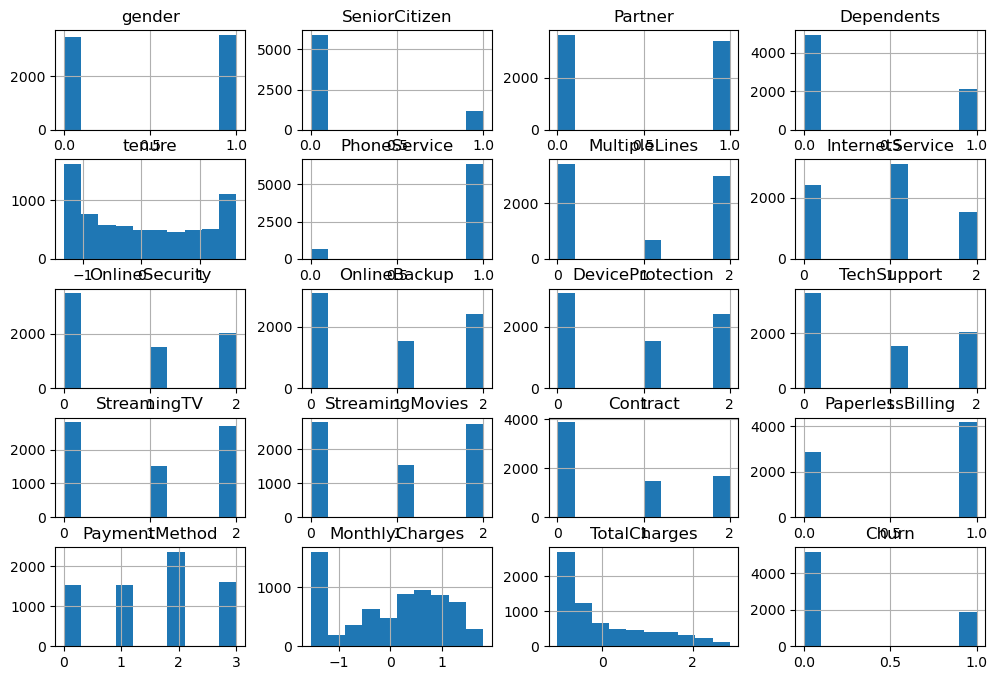

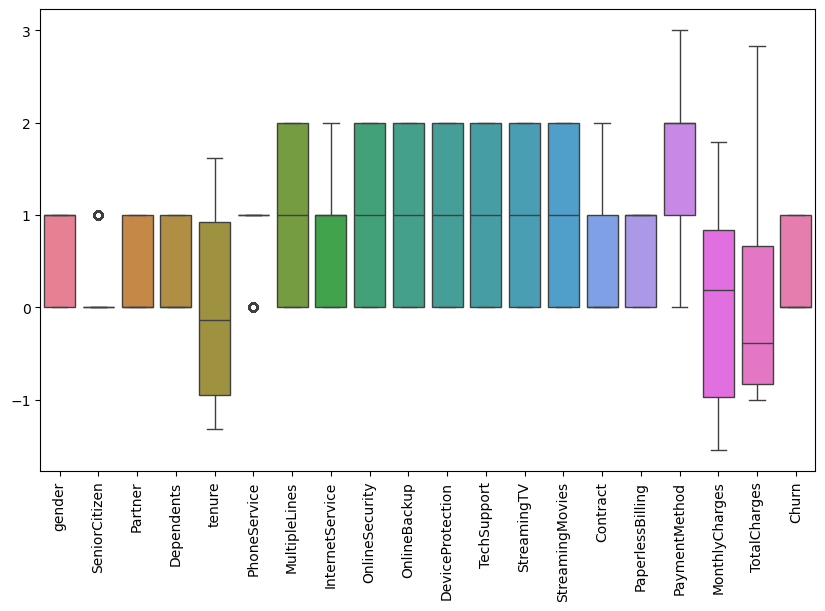

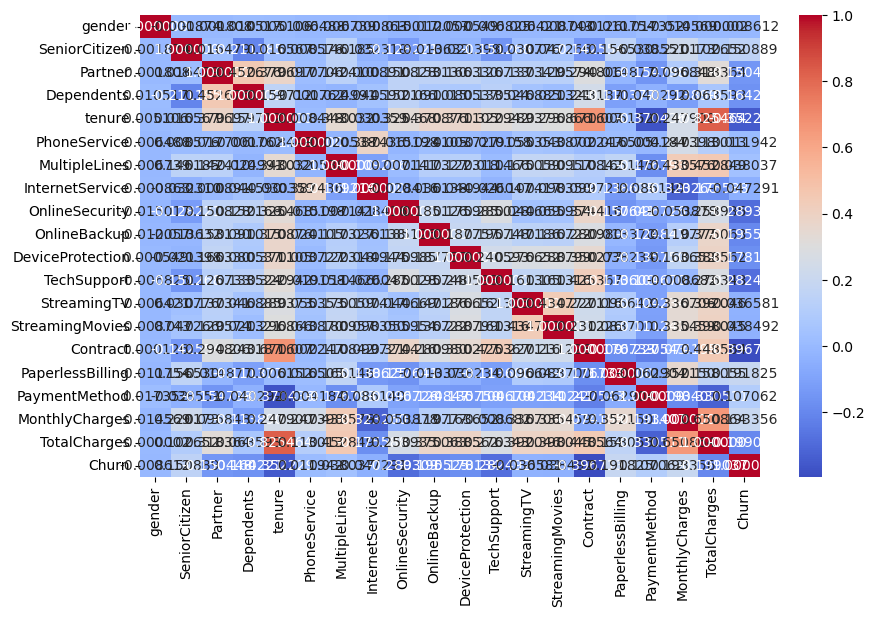

In [27]:
import matplotlib.pyplot as plt  
import seaborn as sns  

 
df.hist(figsize=(12, 8))  
plt.show()  

  
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df)  
plt.xticks(rotation=90)  
plt.show()  

  
plt.figure(figsize=(10, 6))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt="2f")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split  

X = df.drop(columns=['Churn'])    
y = df['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression()  
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

y_pred = model.predict(X_test)  

print("Accuracy:", accuracy_score(y_test, y_pred))  
print("Classification Report:\n", classification_report(y_test, y_pred))  
print("Consfusion matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8176011355571328
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Consfusion matrix :
 [[935 101]
 [156 217]]
